In [26]:

# Let's load the files uploaded by the user and make the necessary corrections to the code.

# Load the files for analysis
correlation_analysis_path = "correlation_analysis.py"
hypothesis_testing_path = "hypothesis_testing.py"
season_data_path = "all_seasons_player_stats_rounded.csv"

import pandas as pd

# Load the season data
season_data = pd.read_csv(season_data_path)

# Display first few rows of the dataset to inspect its structure
season_data.head()


,Unique_ID,season,player_id,player_id_clean,player_name,player_matches_played,player_position_id,player_position_name,player_team_name,team_id,...,player-super-tackles_points_per_match,player-raid-points_points_per_match,player-super-raids_points_per_match,high-5s_points_per_match,player-tackle-points_points_per_match,player-dod-raid-points_points_per_match,player-total-points_points_per_match,player-successful-tackles_points_per_match,player-successful-raids_points_per_match,super-10s_points_per_match
0,team_id_7|Season3|Simon Kibura,3,10.0,10,Simon Kibura,2,8,Raider,PUN,7,...,NaN,1.00,NaN,NaN,NaN,0.50,1.00,NaN,1.00,NaN
1,team_id_4|Season3|Jang Kun Lee,3,12.0,12,Jang Kun Lee,15,8,Raider,KOL,4,...,0.13,5.27,0.13,NaN,0.73,2.20,6.00,0.60,4.27,0.13
2,team_id_2|Season3|Seong Ryeol Kim,3,13.0,13,Seong Ryeol Kim,8,9,Defender,DEL,2,...,NaN,0.38,NaN,NaN,0.25,0.25,0.62,0.25,0.25,NaN
3,team_id_6|Season3|Tae Deok Eom,3,14.0,14,Tae Deok Eom,7,9,Defender,PAT,6,...,NaN,0.14,NaN,NaN,NaN,NaN,0.14,NaN,0.14,NaN
4,team_id_7|Season3|Ajay Thakur,3,26.0,26,Ajay Thakur,14,8,Raider,PUN,7,...,NaN,3.71,0.14,NaN,0.29,1.64,4.00,0.29,2.93,0.07


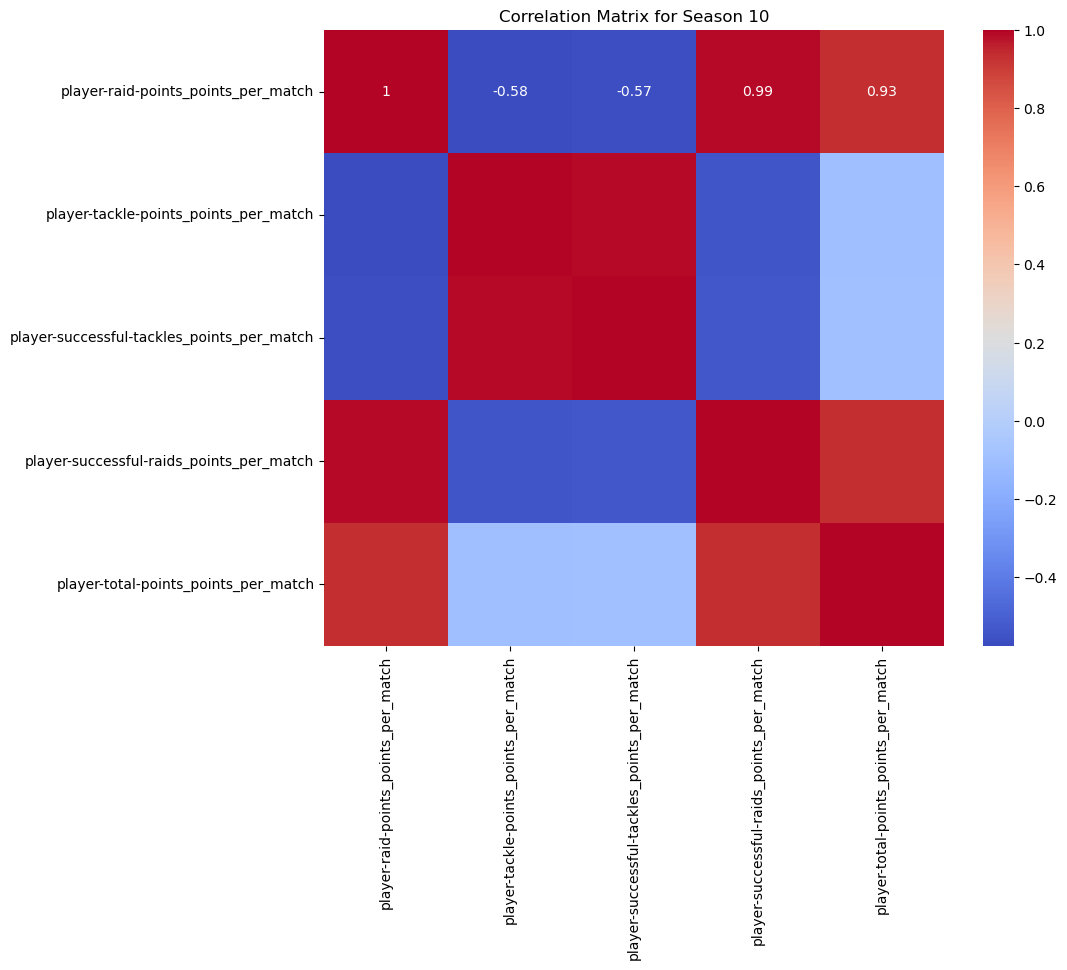

High Correlation Pairs (absolute correlation > 0.70):
player-raid-points_points_per_match and player-successful-raids_points_per_match have a correlation of 0.99.
This means player-raid-points_points_per_match and player-successful-raids_points_per_match tend to increase or decrease together.

player-raid-points_points_per_match and player-total-points_points_per_match have a correlation of 0.93.
This means player-raid-points_points_per_match and player-total-points_points_per_match tend to increase or decrease together.

player-tackle-points_points_per_match and player-successful-tackles_points_per_match have a correlation of 0.99.
This means player-tackle-points_points_per_match and player-successful-tackles_points_per_match tend to increase or decrease together.

player-successful-tackles_points_per_match and player-tackle-points_points_per_match have a correlation of 0.99.
This means player-successful-tackles_points_per_match and player-tackle-points_points_per_match tend to increa

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare the data for season 10
def prepare_data(data, season):
    return data[data['season'] == season]

# Select relevant columns for analysis
def calculate_correlations(data, columns_to_analyze):
    return data[columns_to_analyze].corr()

# Visualize the correlations
def visualize_correlations(corr_matrix):
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix for Season 10')
    plt.show()

def explain_correlation(corr_matrix: pd.DataFrame, threshold: float = 0.7) -> None:
    """
    Explain high correlation pairs based on a threshold.

    Parameters:
        corr_matrix (pd.DataFrame): The correlation matrix.
        threshold (float): Correlation threshold to highlight strong correlations.
    """
    high_corr = (corr_matrix.abs() > threshold) & (corr_matrix != 1.0)
    strong_correlations = high_corr.stack().reset_index()
    strong_correlations = strong_correlations[strong_correlations[0]]

    print("High Correlation Pairs (absolute correlation > {:.2f}):".format(threshold))
    for index, row in strong_correlations.iterrows():
        col1, col2, _ = row
        corr_value = corr_matrix.loc[col1, col2]
        print(f"{col1} and {col2} have a correlation of {corr_value:.2f}.")
        if corr_value > 0:
            print(f"This means {col1} and {col2} tend to increase or decrease together.")
        else:
            print(f"This means when {col1} increases, {col2} tends to decrease, and vice versa.")
        print()

# Load the data
data = pd.read_csv('all_seasons_player_stats_rounded.csv')

# Filter for season 10
season_10_data = prepare_data(data, season=10)

# Define columns to analyze
columns_to_analyze = [
    'player-raid-points_points_per_match', 'player-tackle-points_points_per_match',
    'player-successful-tackles_points_per_match', 'player-successful-raids_points_per_match',
    'player-total-points_points_per_match'
]

# Calculate correlations
corr_matrix = calculate_correlations(season_10_data, columns_to_analyze)

# Visualize the correlations
visualize_correlations(corr_matrix)




In [31]:
# Explain correlations with a threshold of 0.7 (strong correlation)
explain_correlation(corr_matrix, threshold=0.7)

High Correlation Pairs (absolute correlation > 0.70):
player-raid-points_points_per_match and player-successful-raids_points_per_match have a correlation of 0.99.
This means player-raid-points_points_per_match and player-successful-raids_points_per_match tend to increase or decrease together.

player-raid-points_points_per_match and player-total-points_points_per_match have a correlation of 0.93.
This means player-raid-points_points_per_match and player-total-points_points_per_match tend to increase or decrease together.

player-tackle-points_points_per_match and player-successful-tackles_points_per_match have a correlation of 0.99.
This means player-tackle-points_points_per_match and player-successful-tackles_points_per_match tend to increase or decrease together.

player-successful-tackles_points_per_match and player-tackle-points_points_per_match have a correlation of 0.99.
This means player-successful-tackles_points_per_match and player-tackle-points_points_per_match tend to increa

In [24]:
import pandas as pd
from scipy import stats

# Perform T-test
def perform_ttest(home_scores, away_scores):
    t_stat, p_value = stats.ttest_ind(home_scores, away_scores)
    return {'t_stat': t_stat, 'p_value': p_value}

# Interpret the results
def interpret_results(p_value, alpha=0.05):
    if p_value < alpha:
        return "Statistically significant difference between home and away scores."
    else:
        return "No statistically significant difference between home and away scores."

# Load match stats for season 10
match_stats = pd.read_json('S10_PKL_MatchData.json')

# List of teams to compare
teams = ['Bengal Warriors', 'U Mumba', 'Jaipur Pink Panthers']

# Initialize a dictionary to store teams' scores
team_scores = {team: {'home_scores': [], 'away_scores': []} for team in teams}

# Iterate through matches
for match in match_stats['matches']:
    participants = match['participants']
    home_team = participants[0]['name']
    away_team = participants[1]['name']
    home_score = int(participants[0]['value'])
    away_score = int(participants[1]['value'])
    
    # Check if the home or away team is in the list of teams
    if home_team in teams:
        team_scores[home_team]['home_scores'].append(home_score)
        team_scores[home_team]['away_scores'].append(away_score)
    
    if away_team in teams:
        team_scores[away_team]['away_scores'].append(away_score)
        team_scores[away_team]['home_scores'].append(home_score)

# Perform T-test for each team
for team, scores in team_scores.items():
    print(f"--- {team} ---")
    home_scores = scores['home_scores']
    away_scores = scores['away_scores']
    
    if home_scores and away_scores:
        result = perform_ttest(home_scores, away_scores)
        interpretation = interpret_results(result['p_value'])
        print(f"T-statistic: {result['t_stat']}, P-value: {result['p_value']}")
        print(interpretation)
    else:
        print(f"Not enough data to perform the t-test for {team}.")


--- Bengal Warriors ---
T-statistic: 1.8744703840327712, P-value: 0.06783189234375582
No statistically significant difference between home and away scores.
--- U Mumba ---
T-statistic: 1.8971798707135166, P-value: 0.06469394681025577
No statistically significant difference between home and away scores.
--- Jaipur Pink Panthers ---
T-statistic: -0.23234500764745808, P-value: 0.8173473989264518
No statistically significant difference between home and away scores.
